In [1]:
import pandas as pd
import numpy as np

# Read the Excel file
df = pd.read_excel('H:/dataset/Coursework Dataset.xlsx')


<AxesSubplot:>

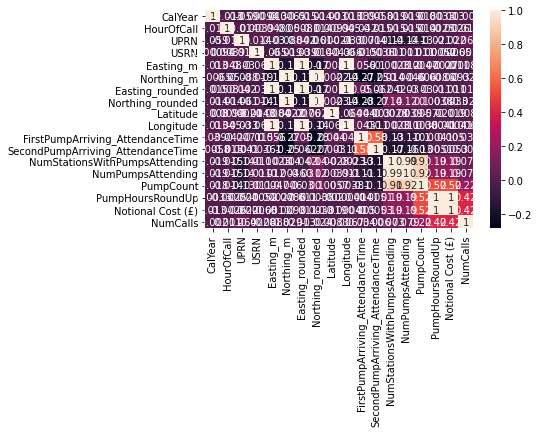

In [3]:
# Check for missing values
df.isna().sum()

# Summary statistics
df.describe()

# Distributions
import seaborn as sns
sns.histplot(df['Notional Cost (£)'])

# Correlations
sns.heatmap(df.corr(), annot=True)


In [4]:
#### Handling missing values

df.dropna(inplace=True)

# Removing duplicates
df.drop_duplicates(inplace=True)

# Correcting data types
df['NumCalls'] = pd.to_numeric(df['NumCalls'], errors='coerce')


In [15]:
### Check the data types


print(df.dtypes)

# Convert date and time columns to datetime format
df['DateOfCall'] = pd.to_datetime(df['DateOfCall'])
df['TimeOfCalln'] = pd.to_datetime(df['TimeOfCall'], format='%H:%M:%S')

# Convert numerical columns to float or int format
df['HourOfCall'] = pd.to_numeric(df['HourOfCall'], errors='coerce')
df['integer_column'] = df['integer_column'].astype(int)

# Remove columns with incorrect data types
df = df.select_dtypes(include=['float64', 'int64', 'datetime64'])


IncidentNumber                                    object
DateOfCall                                datetime64[ns]
CalYear                                            int64
TimeOfCall                                        object
HourOfCall                                         int64
IncidentGroup                                     object
StopCodeDescription                               object
SpecialServiceType                                object
PropertyCategory                                  object
PropertyType                                      object
AddressQualifier                                  object
Postcode_full                                     object
Postcode_district                                 object
UPRN                                               int64
USRN                                               int64
IncGeo_BoroughCode                                object
IncGeo_BoroughName                                object
ProperCase                     

KeyError: 'integer_column'

In [11]:
### Missing values

# Check for missing values
print(df.isnull().sum())

# Handle missing values by imputation or removal
df['CalYear'].fillna(df['CalYear'].mean(), inplace=True)  # Replace missing values with column mean
df.dropna(inplace=True)  # Remove rows with missing values


IncidentNumber                               0
DateOfCall                                   0
CalYear                                      0
TimeOfCall                                   0
HourOfCall                                   0
IncidentGroup                                0
StopCodeDescription                          0
SpecialServiceType                        9586
PropertyCategory                             0
PropertyType                                 0
AddressQualifier                             0
Postcode_full                             9547
Postcode_district                            0
UPRN                                         0
USRN                                         0
IncGeo_BoroughCode                           0
IncGeo_BoroughName                           0
ProperCase                                   0
IncGeo_WardCode                              0
IncGeo_WardName                              0
IncGeo_WardNameNew                           0
Easting_m    

In [20]:
### Outliers

# Identify non-datetime columns
non_datetime_cols = [col for col in df.columns if df[col].dtype != 'datetime64[ns]']

# Identify outliers using Z-score
z_scores = np.abs((df[non_datetime_cols] - df[non_datetime_cols].mean()) / df[non_datetime_cols].std())
outliers = df[(z_scores > 3).any(axis=1)]

# Handle outliers by removal or correction
df = df[(z_scores < 3).all(axis=1)]  # Remove rows with outliers

# Define lower and upper bounds for clipping
lower_bound = 0
upper_bound = 1000

# Clip outliers to a certain range
df['NumCalls'].clip(lower=lower_bound, upper=upper_bound, inplace=True)


In [21]:
### Identify duplicate rows based on all columns

duplicates = df[df.duplicated()]

# Handle duplicates by removal or merging
df.drop_duplicates(inplace=True)  # Remove duplicate rows
# OR
# df = df.groupby(['column1', 'column2']).agg({'column3': 'mean'}).reset_index()
# Merge duplicate rows based on certain columns



,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,...,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpHoursRoundUp,Notional Cost (£),NumCalls


In [25]:
# Convert TimeOfCall column to datetime format
df['TimeOfCall'] = pd.to_datetime(df['TimeOfCall'])

# Extract new features
df['hour'] = df['TimeOfCall'].dt.hour  # Extract hour from DateTime column
df['day_of_week'] = df['TimeOfCall'].dt.dayofweek  # Extract day of week from DateTime column
df['weekday'] = df['day_of_week'].apply(lambda x: 1 if x < 5 else 0)  # Create a new feature to indicate weekday or weekend


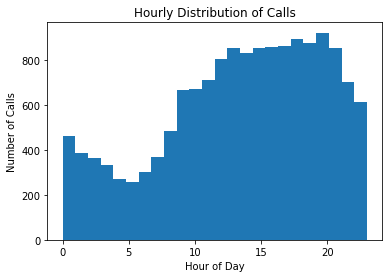

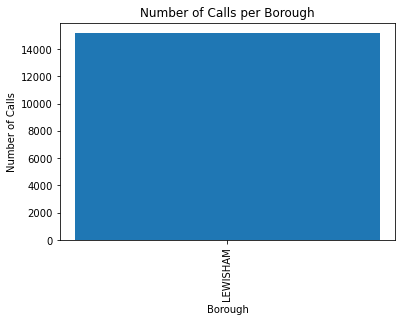

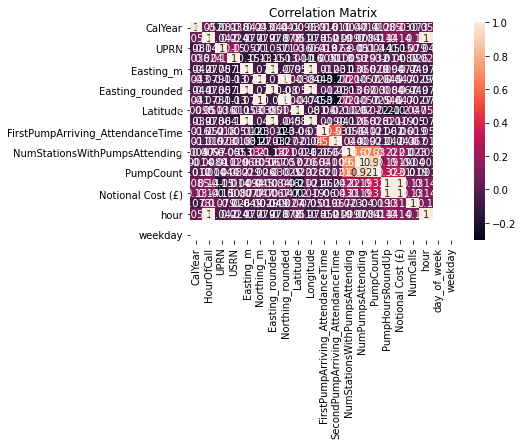

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Read the Excel file
df = pd.read_excel('H:/dataset/Coursework Dataset.xlsx')

# Convert TimeOfCall column to datetime format
df['TimeOfCall'] = pd.to_datetime(df['TimeOfCall'])

# Extract new features
df['hour'] = df['TimeOfCall'].dt.hour  # Extract hour from DateTime column
df['day_of_week'] = df['TimeOfCall'].dt.dayofweek  # Extract day of week from DateTime column
df['weekday'] = df['day_of_week'].apply(lambda x: 1 if x < 5 else 0)  # Create a new feature to indicate weekday or weekend

# EDA: Histogram of hourly distribution of calls
plt.hist(df['hour'], bins=24)
plt.title('Hourly Distribution of Calls')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Calls')
plt.show()

# EDA: Bar chart of number of calls per borough
calls_per_borough = df['IncGeo_BoroughName'].value_counts()
plt.bar(calls_per_borough.index, calls_per_borough.values)
plt.xticks(rotation=90)
plt.title('Number of Calls per Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Calls')
plt.show()
df.dropna(inplace=True)

# EDA: Correlation matrix
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

# K-means clustering
X = df[['Longitude', 'Latitude']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
kmeans = KMeans(n_clusters=5)
kmeans.fit(X_scaled)
df['cluster'] = kmeans.predict(X_scaled)

# Plot clusters on map
import folium

center_lat, center_long = np.mean(df['Latitude']), np.mean(df['Longitude'])
m = folium.Map(location=[center_lat, center_long], zoom_start=11)

colors = ['red', 'blue', 'green', 'purple', 'orange']
for i in range(kmeans.n_clusters):
    cluster = df[df['cluster'] == i]
    for _, row in cluster.iterrows():
        folium.CircleMarker(location=[row['Latitude'], row['Longitude']],
                            color=colors[i], radius=3).add_to(m)
        
m.save('cluster_map.html')


C:\Users\za pc\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


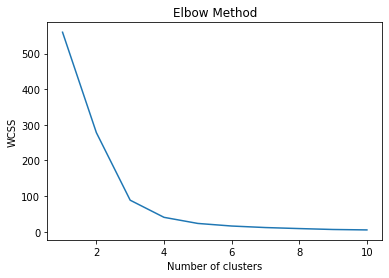

In [39]:
### Evaluation of clustering quality

from sklearn.metrics import silhouette_score
silhouette_score(X_scaled, kmeans.labels_)


### Elbow method 
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [ ]:
X = df[['Longitude', 'Latitude', 'CalYear', 'HourOfCall']]